# LSTM

1. Wprowadzenie do sieci LSTM
2. Import bibliotek
3. Baza danych
4. Wstƒôpna analiza tekstu
5. Modele treningowe (poszukiwanie optymalnego rozwiƒÖzania)
6. Praca na modelu
7. Analiza sentymentu
8. Podsumowanie

1. Wprowadzenie do sieci LSTM

Long Short-Term Memory to ulepszona wersja rekurencyjnej sieci neuronowej zaprojektowanej przez Hochreitera & Schmidhubera. LSTM dobrze nadaje siƒô do zada≈Ñ przewidywania sekwencji i specjalizuje siƒô w wychwytywaniu d≈Çugoterminowych zale≈ºno≈õci. Jego zastosowania obejmujƒÖ zadania obejmujƒÖce szeregi i sekwencje czasowe. Si≈Ça LSTM le≈ºy w jego zdolno≈õci do uchwycenia zale≈ºno≈õci kolejno≈õci kluczowych w rozwiƒÖzywaniu skomplikowanych problem√≥w, takich jak t≈Çumaczenie maszynowe i rozpoznawanie mowy.

Co to jest LSTM?

Tradycyjny RNN ma jeden ukryty stan, kt√≥ry jest przekazywany w czasie, co mo≈ºe utrudniaƒá sieci nauczenie siƒô d≈Çugoterminowych zale≈ºno≈õci. LSTM rozwiƒÖzujƒÖ ten problem, wprowadzajƒÖc kom√≥rkƒô pamiƒôci, kt√≥ra jest pojemnikiem mogƒÖcym przechowywaƒá informacje przez d≈Çu≈ºszy czas. Sieci LSTM potrafiƒÖ uczyƒá siƒô d≈Çugoterminowych zale≈ºno≈õci w danych sekwencyjnych, co czyni je dobrze dostosowanymi do takich zada≈Ñ, jak t≈Çumaczenie jƒôzyk√≥w, rozpoznawanie mowy i prognozowanie szereg√≥w czasowych. LSTM mo≈ºna r√≥wnie≈º stosowaƒá w po≈ÇƒÖczeniu z innymi architekturami sieci neuronowych, takimi jak konwolucyjne sieci neuronowe (CNN) do analizy obrazu i wideo.

Kom√≥rka pamiƒôci jest kontrolowana przez trzy bramki: bramkƒô wej≈õciowƒÖ, bramkƒô zapominania i bramkƒô wyj≈õciowƒÖ. Bramki te decydujƒÖ, jakie informacje dodaƒá, usunƒÖƒá i wyprowadziƒá z kom√≥rki pamiƒôci. Bramka wej≈õciowa kontroluje, jakie informacje sƒÖ dodawane do kom√≥rki pamiƒôci. Bramka zapominania kontroluje, jakie informacje sƒÖ usuwane z kom√≥rki pamiƒôci. Bramka wyj≈õciowa kontroluje, jakie informacje sƒÖ wysy≈Çane z kom√≥rki pamiƒôci. Dziƒôki temu sieci LSTM mogƒÖ selektywnie zatrzymywaƒá lub odrzucaƒá informacje przep≈ÇywajƒÖce przez sieƒá, co pozwala im uczyƒá siƒô d≈Çugoterminowych zale≈ºno≈õci.

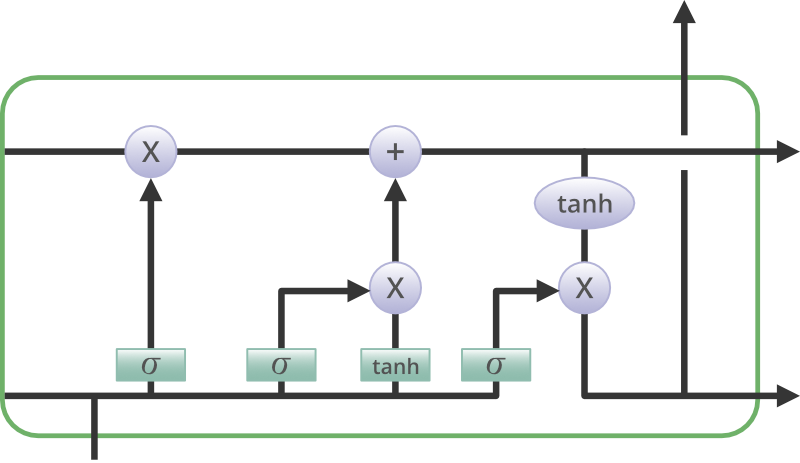



Dwukierunkowy LSTM

Dwukierunkowy LSTM (Bi LSTM/BLSTM) to rekurencyjna sieƒá neuronowa (RNN), kt√≥ra jest w stanie przetwarzaƒá dane sekwencyjne zar√≥wno w kierunku do przodu, jak i do ty≈Çu. Dziƒôki temu Bi LSTM mo≈ºe uczyƒá siƒô zale≈ºno≈õci o wiƒôkszym zasiƒôgu w danych sekwencyjnych ni≈º tradycyjne LSTM, kt√≥re mogƒÖ przetwarzaƒá dane sekwencyjne tylko w jednym kierunku.

2. Import bibliotek

In [1]:
import pandas as pd
import numpy as np


!pip install -q tensorflow
!pip install -q spacy
!python -m spacy download en_core_web_md -q
!pip install Wordcloud -q
!pip install accelerate -q
!pip install transformers -q
!pip install datasets -q

import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
import tensorflow as tf

from wordcloud import WordCloud, STOPWORDS

from tqdm import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score, roc_curve

from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Embedding, Dropout
from tensorflow.keras.layers import Activation, Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D

from keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

from torchtext.data.utils import get_tokenizer
from torch.utils.data import random_split
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import time

import en_core_web_sm

2023-12-27 08:46:00.260545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 08:46:00.264507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 08:46:00.267125: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 08:46:00.294440: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 08:46:02.655101: W tensorflow/compiler/tf2

In [2]:
!pip install -U accelerate==0.20.3 -q
import accelerate
!pip install transformers -q
import transformers

#!pip install accelerate -U -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227.6/227.6 kB 2.7 MB/s eta 0:00:00


3. Baza danych

Baza danych pochodzi z zasob√≥w kaggle i znajduje siƒô pod linkiem:
https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

Baza obejmuje 20 491 recenzje klient√≥w dotyczƒÖcych hoteli, z kt√≥rych skorzystali. Rating w skali 1 - 5 z dominacjƒÖ 4 i 5.

In [3]:
# Dane umie≈õci≈Çam na google drive, skƒÖd je pobieram

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/tripadvisor_hotel_reviews.csv'
row_data = pd.read_csv(path)
row_data

Mounted at /content/drive


Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

In [4]:
# Zamieniam Rating na 3 klasy

row_data['Rating_class'] = row_data['Rating'].replace({5: 'Positive', 4: 'Positive', 3: 'Neutral',
                                                      2:'Negative', 1:'Negative'})
row_data

Review  Rating Rating_class
0      nice hotel expensive parking got good deal sta...       4     Positive
1      ok nothing special charge diamond member hilto...       2     Negative
2      nice rooms not 4* experience hotel monaco seat...       3      Neutral
3      unique, great stay, wonderful time hotel monac...       5     Positive
4      great stay great stay, went seahawk game aweso...       5     Positive
...                                                  ...     ...          ...
20486  best kept secret 3rd time staying charm, not 5...       5     Positive
20487  great location price view hotel great quick pl...       4     Positive
20488  ok just looks nice modern outside, desk staff ...       2     Negative
20489  hotel theft ruined vacation hotel opened sept ...       1     Negative
20490  people talking, ca n't believe excellent ratin...       2     Negative

[20491 rows x 3 columns]

In [5]:
# Tworzƒô kopiƒô danych

data = row_data.copy()
del data['Rating']

4. Wstƒôpna analiza tekstu

Przechodze do analizy tekstu dotyczƒÖcej m.in identyfikacji ka≈ºdej z 3 grup klient√≥w, stworzenia WordCloud na podstawie wcze≈õniej zdefiniowanej pr√≥bki.
Definiujƒô funkcjƒô remove_stopwords w celu usuniƒôcia s≈Ç√≥w takich jak 'the' czy 'and' oraz uruchamiam proces lematyzacji w celu ujednolicenia odmiany s≈Ç√≥w.

In [6]:
data.shape

(20491, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        20491 non-null  object
 1   Rating_class  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [8]:
data.groupby('Rating_class').nunique()

Review
Rating_class        
Negative        3214
Neutral         2184
Positive       15093

<Axes: xlabel='Rating_class', ylabel='count'>

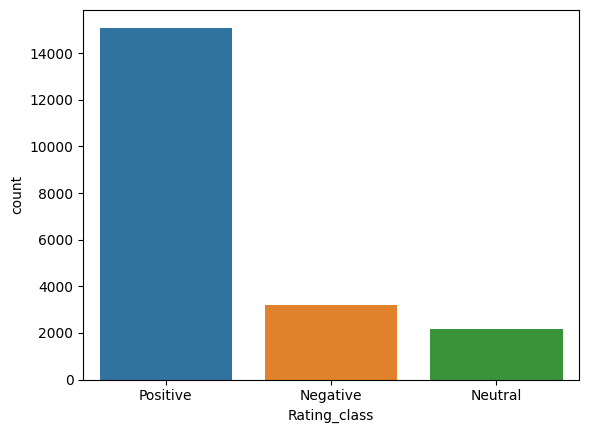

In [9]:
sns.countplot(x='Rating_class', data=data)

In [10]:
data['Review'] = data['Review'].apply(lambda x: x.lower())
data.sample(10)

Review Rating_class
2400   way expectations booking hotel looked expedia ...     Negative
10073  nice nice nice stayed ambassador nights, greet...     Positive
10453  barely passable read good reviews frommers pla...     Negative
3156   heaven earth, husband spent 2 fabulous weeks m...     Positive
12747  great city stayed millenium hilton 29th decemb...     Positive
19482  fantastic, going year, husband riu palace 7nig...     Positive
14311  excellent hotel, hotel great bargain, staff fr...     Positive
14512  birthday meal havnt stayed hotel staying barce...     Positive
427    mixed experience travel frequently work pleasu...      Neutral
10008  langlois revisited just returned girlie weeken...     Positive

In [11]:
import spacy

nlp = spacy.load('en_core_web_md', disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')

In [12]:
def remove_stopwords(text):
  return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

data['Review'] = data['Review'].apply(remove_stopwords)
data.sample(10)

Review Rating_class
13368  poor service impressions great, arrival young ...     Negative
19473  nice lots maids/cleaners sticky fingers spent ...     Negative
164    great older hotel downtown location great espe...     Positive
13894  fantastic hotel, recently returned 3 night bre...     Positive
4509   especially art fan stay, loved hotel primarily...     Positive
313    unique exceptional, loved stay, husband spent ...     Positive
18321  bargain weekend excellent stay quality hotel.t...     Positive
1662   amazing getaway, day trip san francisco perfec...     Positive
19511  certainly worth money returned trip tortuga ba...     Negative
9796   excellent location spent 4 nights nouvel hotel...     Positive

In [13]:
data.drop_duplicates(subset='Review', keep='first', inplace=True)

In [14]:
a=data[data['Rating_class']== 'Positive'].sample(1000)
b=data[data['Rating_class']== 'Neutral'].sample(1000)
c=data[data['Rating_class']== 'Negative'].sample(1000)

data5k = pd.concat([a,b,c])

In [15]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

data5k['Review'] = data5k['Review'].progress_apply(lemmatize)
data5k.sample(10)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3000/3000 [01:42<00:00, 29.29it/s]


Review Rating_class
12577  german , fantastic resort expect great weather...     Negative
13064  recommend boston staying room tiny small climb...     Negative
16186  proof pudde stay night leg trip go thailand , ...     Positive
17628  terrible service ignorant staff read great rev...     Negative
907    romantic rex rex perfect hotel enjoy romantic ...     Positive
14194  huge new year disappointment husband stay 3 ni...     Negative
18607  pretty resort get sick husband stay majestic 8...      Neutral
6523   stay away dennys stay h. inn july hotel good l...     Positive
10925  nice central hotel long weekend paris book her...     Positive
17685  excellent city centre hotel stay 4 night march...     Positive

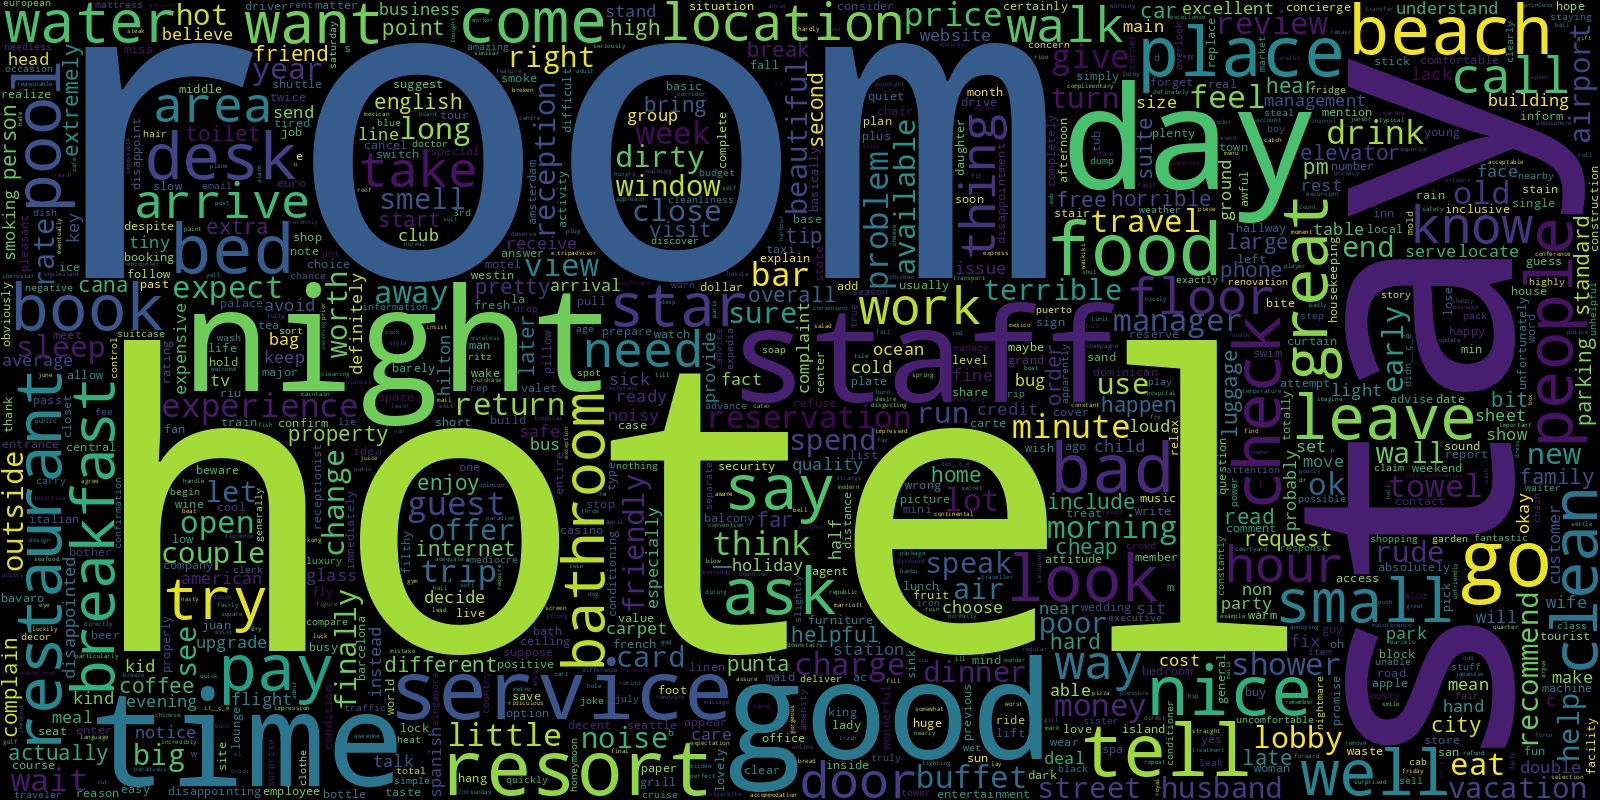

In [16]:
text_neg = ' '.join(data5k[data5k['Rating_class']== 'Negative']['Review'])

wc_neg = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(text_neg)
wc_neg.to_image()

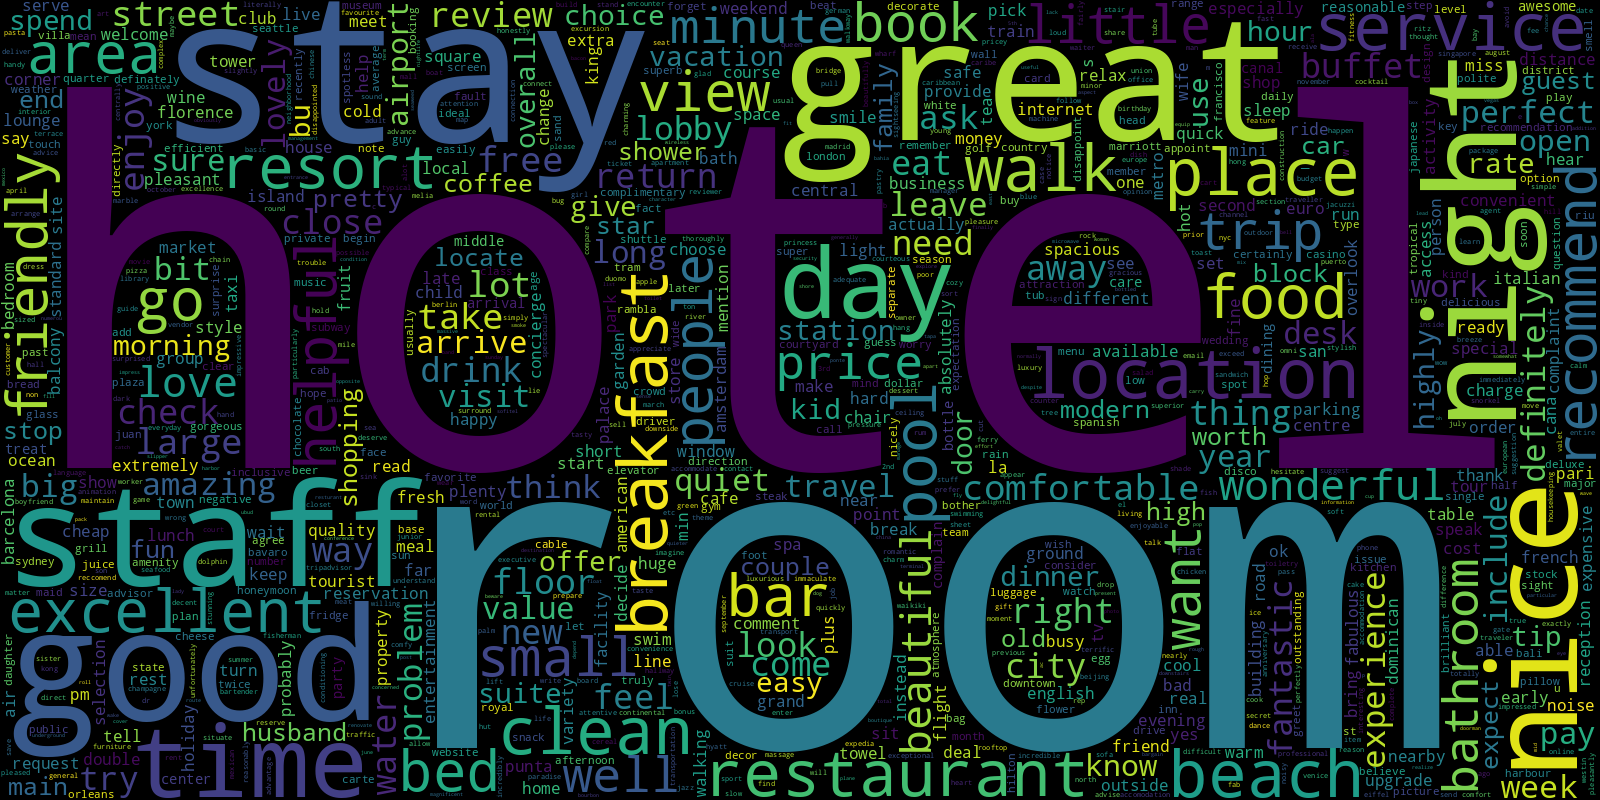

In [17]:
text_pos = ' '.join(data5k[data5k['Rating_class']== 'Positive']['Review'])

wc_pos = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(text_pos)
wc_pos.to_image()

In [18]:
# Klasyfikacja

# Metoda train_test_split: 10% test, 90% train

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data5k.Review, data5k.Rating_class, test_size=0.1, stratify=data5k.Rating_class)

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

In [21]:
len(vectorizer.get_feature_names_out())

1000

In [22]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
print(X_train.shape)
print(X_test.shape)

(2700, 1000)
(300, 1000)


In [24]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.74      0.77       100
     Neutral       0.61      0.53      0.57       100
    Positive       0.66      0.80      0.72       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



5. Modele treningowe (poszukiwanie optymalnego rozwiƒÖzania)

Poni≈ºej prezentuje wyniki analizy na podstawie wcze≈õniej przygotowanych modeli. Za≈ÇƒÖczam modele oraz wykresy obrazujƒÖce val_loss i val_accuracy.
Moim celem by≈Ço znalezienie modelu, dla kt√≥rego val_accuracy bƒôdzie najwy≈ºsze przy jednoczesnym jak najni≈ºszym val_loss przed epoch, w kt√≥rej dochodzi do przeuczenia modelu.

In [26]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

Model 1 obejmuje jednƒÖ wartswƒô LSTM bez Dropout, najwy≈ºsza warto≈õc val_accuracy wystƒôpuje w 3 epoch (val_loss: 0.9086 - val_accuracy: 0.5867), po czym wystƒôpuje przeuczenie modelu.

In [30]:
model = None
r = None

model = load_model('model_single_LSTM.h5')

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1004)]            0         
                                                                 
 embedding (Embedding)       (None, 1004, 20)          328220    
                                                                 
 lstm (LSTM)                 (None, 1004, 128)         76288     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 404895 (1.54 MB)
Trainable params: 404895 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________

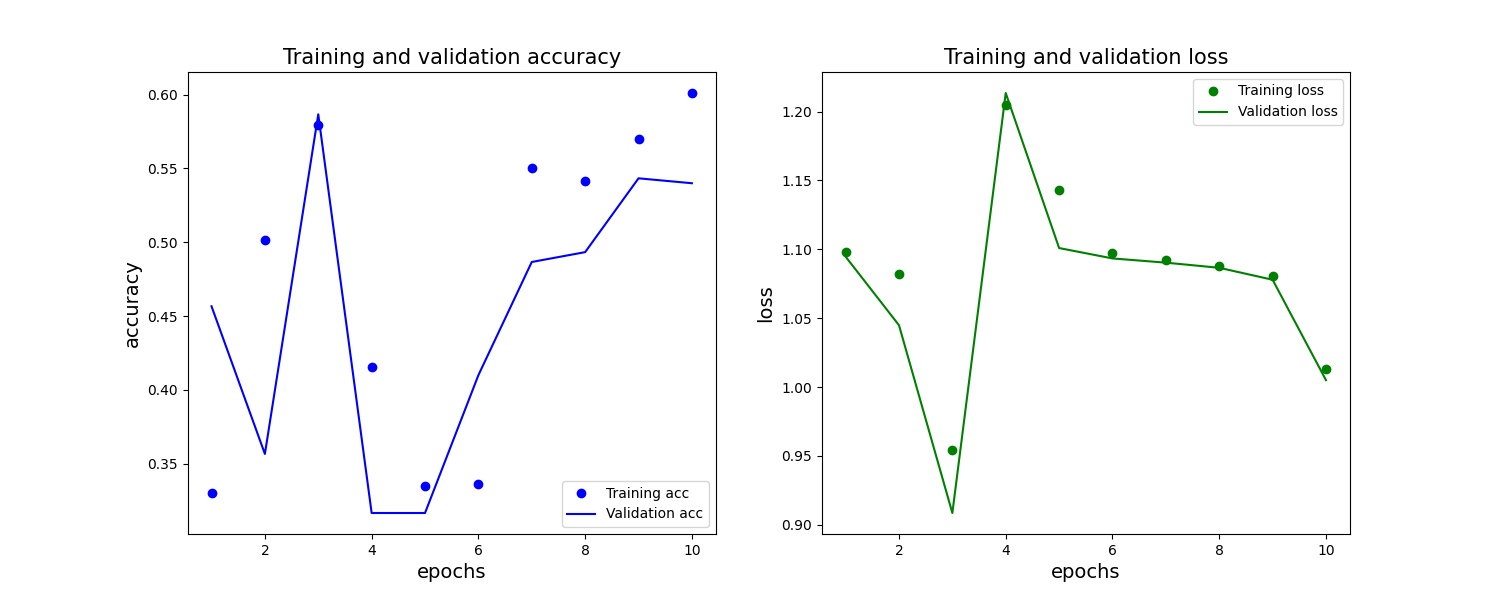

In [35]:
import PIL
from PIL import Image

fp = 'model_single_LSTM.png'
PIL.Image.open(fp, mode='r', formats=None)

In [ ]:
model.get_config()

Model 2 obejmuje stworzenie 3 warstw LSTM wraz z Dropout, najwy≈ºsza warto≈õƒá val_acuracy wystƒôpuje w 4 epoch (val_loss: 0.7684 - val_accuracy: 0.6333), nastƒôpne model sie przeucza.

In [37]:
model = None
r = None

model = load_model('model_3LSTM.h5')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1004)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1004, 20)          328220    
                                                                 
 lstm_1 (LSTM)               (None, 1004, 128)         76288     
                                                                 
 dropout (Dropout)           (None, 1004, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 1004, 128)         131584    
                                                                 
 dropout_1 (Dropout)         (None, 1004, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 1004, 128)         1315

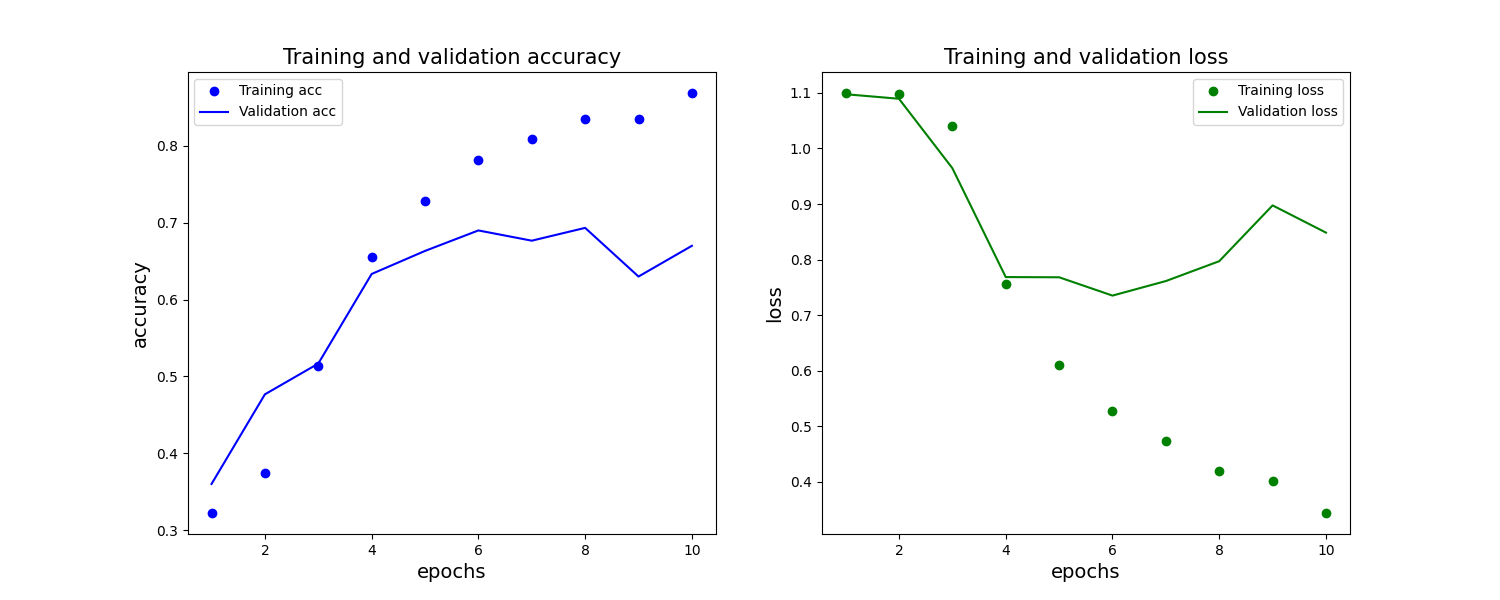

In [38]:
fp = 'model_3LSTM.png'
PIL.Image.open(fp, mode='r', formats=None)

In [ ]:
model.get_config()

Model 3 to siec dwukierunkowa LSTM z trzema warstwami Bidirectional LSTM oraz Dropout. Wynik dzia≈Çania sieci to val_loss: 0.7353 - val_accuracy: 0.6667 w 3 epoch.

In [40]:
model = None
r = None

model = load_model('model_BiLSTM.h5')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1004)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 1004, 20)          328220    
                                                                 
 bidirectional (Bidirection  (None, 1004, 256)         152576    
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 1004, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1004, 256)         394240    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 1004, 256)         0   

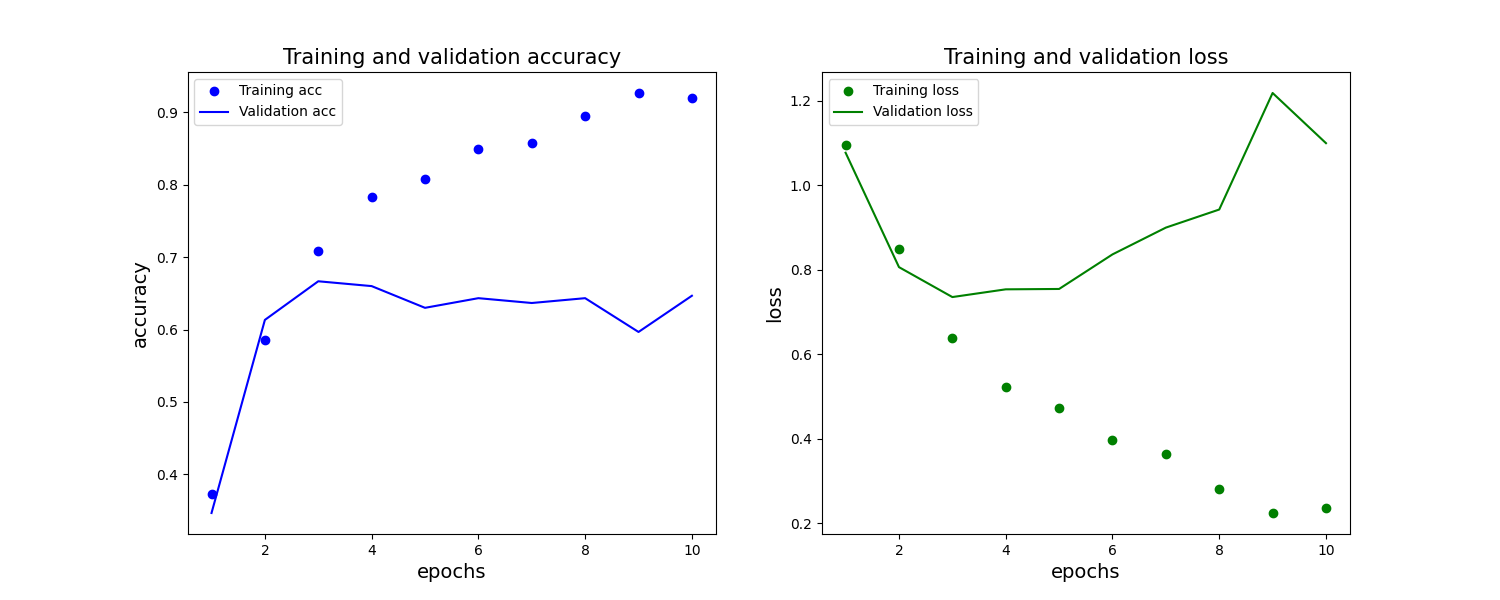

In [41]:
fp = 'model_BiLSTM.png'
PIL.Image.open(fp, mode='r', formats=None)

In [ ]:
model.get_config()

Model 4 to sieƒá z pojedynczƒÖ warstwƒÖ Bidirectional LSTM bez Dropout. Wynikiem dzia≈Çania sieci jest val_loss: 1.0650 - val_accuracy: 0.4800 w epoc 2 oraz val_loss: 0.7564 - val_accuracy: 0.6467 w epoch 6.

In [43]:
model = None
r = None

model = load_model('model_single_BiLSTM.h5')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1004)]            0         
                                                                 
 embedding_3 (Embedding)     (None, 1004, 20)          328220    
                                                                 
 bidirectional_3 (Bidirecti  (None, 1004, 256)         152576    
 onal)                                                           
                                                                 
 global_max_pooling1d_3 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 481567 (1.84 MB)
Trainable params: 481567 (1.

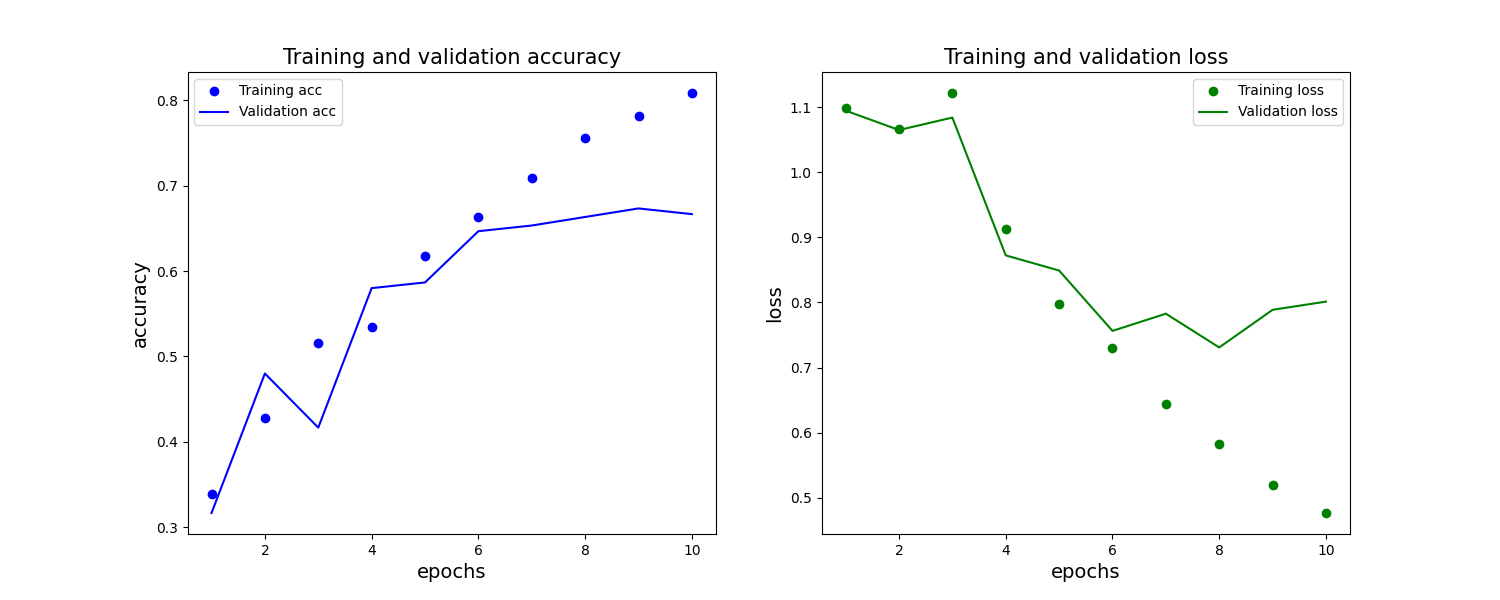

In [44]:
fp = 'model_single_BiLSTM.png'
PIL.Image.open(fp, mode='r', formats=None)

In [ ]:
model.get_config()

Model 5 to sieƒá z pojedynczƒÖ warstwƒÖ Bidirectional LSTM z Dropout. Wynikiem dzia≈Çania sieci jest al_loss: 0.9384 - val_accuracy: 0.5867 w epoch 3.

In [46]:
model = None
r = None

model = load_model('model_single_BiLSTM_Dropout.h5')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1004)]            0         
                                                                 
 embedding_4 (Embedding)     (None, 1004, 20)          328220    
                                                                 
 bidirectional_4 (Bidirecti  (None, 1004, 256)         152576    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 1004, 256)         0         
                                                                 
 global_max_pooling1d_4 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 3)                 771 

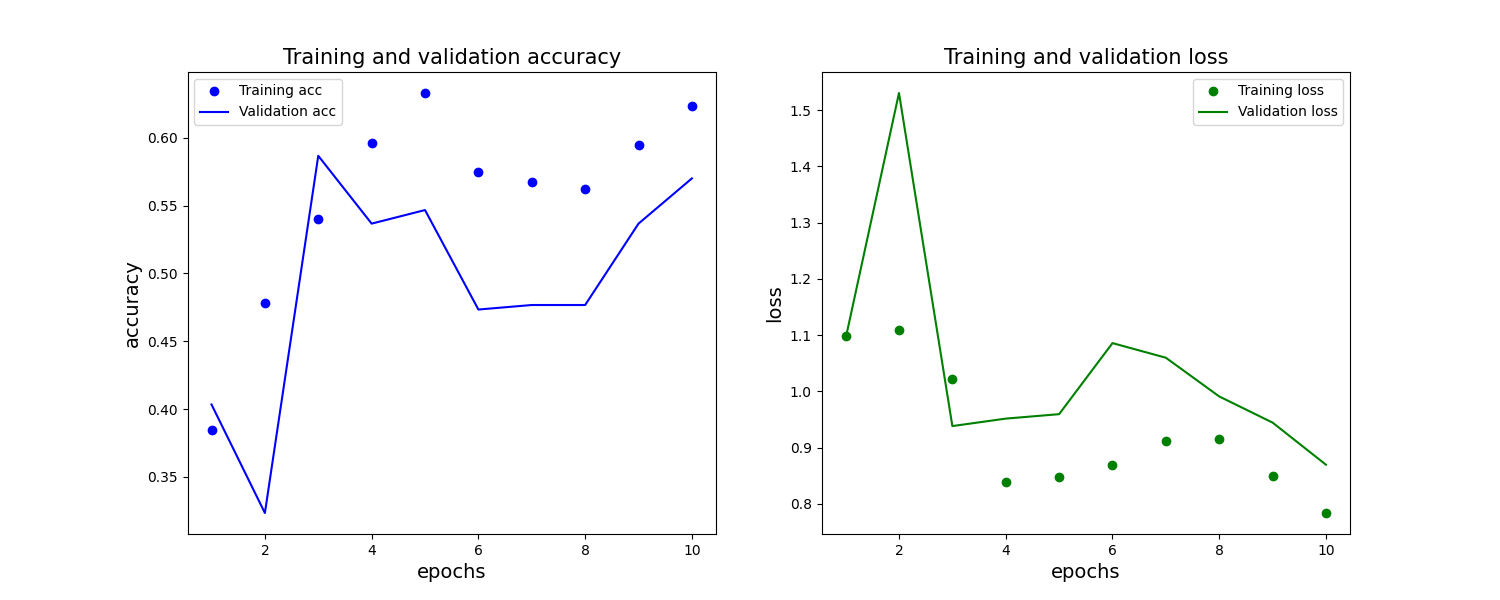

In [47]:
fp = 'model_single_BiLSTM_Dropout.png'
PIL.Image.open(fp, mode='r', formats=None)

In [ ]:
model.get_config()

Podsumowanie modeli

Po przeanalizowaniu 5 wybranych modeli, najni≈ºszy wska≈∫nik val_loss: 0.7353 przy najwy≈ºszym val_accuracy: 0.6667 odnotowa≈Çam w modelu 3 zawierajƒÖcym 3 warstwy Bidirectional LSTM wraz z Dropout. Sieƒá wyglƒÖda r√≥wnie≈º na w miarƒô stabilnƒÖ, dlatego wybra≈Çam jƒÖ do dalszej analizy.

Uwaga: parametry modeli zosta≈Çy dobrane w taki spos√≥b, aby mog≈Çy zostaƒá przeprocesowane przez ≈õrodowisko wykonawcze google colab. Przy doborze innych parametr√≥w ≈õrodowisko roz≈ÇƒÖcza≈Ço siƒô. Zak≈Çadam, ≈ºe osiƒÖgniƒôte wyniki mog≈Çyby byƒá lepsze dla mocniejszego ≈õrodowiska.

In [49]:
import plotly.graph_objects as go

6. Praca na modelu

Poniewa≈º model osiƒÖgnƒÖ≈Ç najwy≈ºszy wynik na epoch 3, dlatego zawƒô≈ºam jego dzia≈Çanie do tego poziomu. Poni≈ºej przechodze ponownie kroki utworzenia modelu.

Budowa modelu:

model = None

r = None

D = 20



Spos√≥b 1:

---


model = Sequential()

model.add(Embedding(V+1,D))

model.add(Bidirectional(LSTM(128, return_sequences = True, activation='tanh')))

model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(128, return_sequences = True, activation='tanh')))

model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(128, return_sequences = True, activation='tanh')))

model.add(Dropout(0.2))

model.add(GlobalMaxPooling1D())

model.add(Dense(K))

model.summary()

Spos√≥b 2:

---

i = Input(shape = (T,))

x = Embedding(V + 1, D)(i)

x = LSTM(128, return_sequences = True, activation='tanh')(x)

x = Dropout(0.2)(x)

x = LSTM(128, return_sequences = True, activation='tanh')(x)

x = Dropout(0.2)(x)

x = LSTM(128, return_sequences = True, activation='tanh')(x)

x = Dropout(0.2)(x)

x = GlobalMaxPooling1D()(x)

x = Dense(K)(x)


model = Model(i,x)

In [67]:
!pip install -U portalocker>=2.0.0 -q
!pip install torchtext -q

In [68]:
tokenizer = get_tokenizer('spacy', 'en_core_web_sm')

def yield_tokens(data_iter):
  for _, text in data_iter:
    yield tokenizer(text)

In [69]:
data5k.head()

Review Rating_class
16730  lovely room bali tropic locate lovely beach so...     Positive
16157  fantastic great location right ground easy tra...     Positive
2330   w great , group 4 girl venture nola celebrate ...     Positive
18997  brilliant great hotel lovely room king size be...     Positive
3575   nice family vacation book annual family vacati...     Positive

In [70]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

data5k['Review'] = data5k['Review'].progress_apply(lemmatize)
data5k.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3000/3000 [01:12<00:00, 41.24it/s]


Review Rating_class
16730  lovely room bali tropic locate lovely beach so...     Positive
16157  fantastic great location right ground easy tra...     Positive
2330   w great , group 4 girl venture nola celebrate ...     Positive
18997  brilliant great hotel lovely room king size be...     Positive
3575   nice family vacation book annual family vacati...     Positive

In [71]:
data5k['Rating_class'] = data5k['Rating_class'].replace({'Positive':3, 'Neutral':2,
                                                      'Negative': 1})
data5k.head()

Review  Rating_class
16730  lovely room bali tropic locate lovely beach so...             3
16157  fantastic great location right ground easy tra...             3
2330   w great , group 4 girl venture nola celebrate ...             3
18997  brilliant great hotel lovely room king size be...             3
3575   nice family vacation book annual family vacati...             3

In [72]:
data5k['targets'] = data5k['Rating_class'].astype("category").cat.codes

In [73]:
# liczba klas

K = data5k['targets'].max()+1
K

3

In [74]:
data_train, data_test = train_test_split(data5k,test_size = 0.1)

In [75]:
data_train.head()

Review  Rating_class  \
13096  fall trap , worth 3.5 star , book hotel hotwir...             1   
18085  blissfull stay tegal sari like stay time bali ...             3   
5408   fantastic rome starhotel michelangelo close st...             2   
4048   year , get long weekend friend 2 - 5 july stay...             2   
6271   wait cruise stay night enter royal caribbean c...             2   

       targets  
13096        0  
18085        2  
5408         1  
4048         1  
6271         1

In [76]:
MAX_VOCAB_SIZE = 2000

tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(data_train['Review'])
sequeces_train = tokenizer.texts_to_sequences(data_train['Review'])
sequeces_test = tokenizer.texts_to_sequences(data_test['Review'])

In [77]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Znaleziono %s uniktowych token√≥w.'%V)

Znaleziono 16589 uniktowych token√≥w.


In [78]:
df_train = pad_sequences(sequeces_train)
print('Kszta≈Çt tensora treningowego:', df_train.shape)

Kszta≈Çt tensora treningowego: (2700, 1607)


In [79]:
T = df_train.shape[1]
T

1607

In [80]:
df_test = pad_sequences(sequeces_test, maxlen = T)
print('Kszta≈Çt tensora treningowego:', df_test.shape)

Kszta≈Çt tensora treningowego: (300, 1607)


In [81]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Bidirectional

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [82]:
model = None
r = None
D = 20

model = Sequential()

model.add(Embedding(V+1,D))
model.add(Bidirectional(LSTM(128, return_sequences = True, activation='tanh')))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences = True, activation='tanh')))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences = True, activation='tanh')))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(K))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          331800    
                                                                 
 bidirectional (Bidirection  (None, None, 256)         152576    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 256)         394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 256)         3

In [83]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('Training model single LSTM ...')

r = model.fit(
    df_train,
    data_train['targets'],
    epochs = 3,
    batch_size = 128,
    validation_data = (df_test, data_test['targets'])
)

Training model single LSTM ...
Epoch 1/3
22/22 [==============================] - 1023s 43s/step - loss: 1.0981 - accuracy: 0.3352 - val_loss: 1.0819 - val_accuracy: 0.3233
Epoch 2/3
22/22 [==============================] - 929s 42s/step - loss: 0.9008 - accuracy: 0.5489 - val_loss: 0.8003 - val_accuracy: 0.6100
Epoch 3/3
22/22 [==============================] - 947s 43s/step - loss: 0.7068 - accuracy: 0.6822 - val_loss: 0.7152 - val_accuracy: 0.7067


In [84]:
def plot_loss_accuracy(r):


  acc = r.history['accuracy']
  val_acc = r.history['val_accuracy']
  loss = r.history['loss']
  val_loss = r.history['val_loss']


  epochs = range(1 ,len(acc) + 1)


  plt.figure(figsize=(15,6))

  plt.subplot(121)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title("Training and validation accuracy", fontsize=15)
  plt.xlabel('epochs', fontsize=14)
  plt.ylabel("accuracy", fontsize=14)
  plt.legend()

  plt.subplot(122)
  plt.plot(epochs, loss, 'go', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title("Training and validation loss", fontsize=15)
  plt.xlabel('epochs', fontsize=14)
  plt.ylabel("loss", fontsize=14)
  plt.legend()

  plt.savefig("model_LSTM_final.png")

  plt.show()

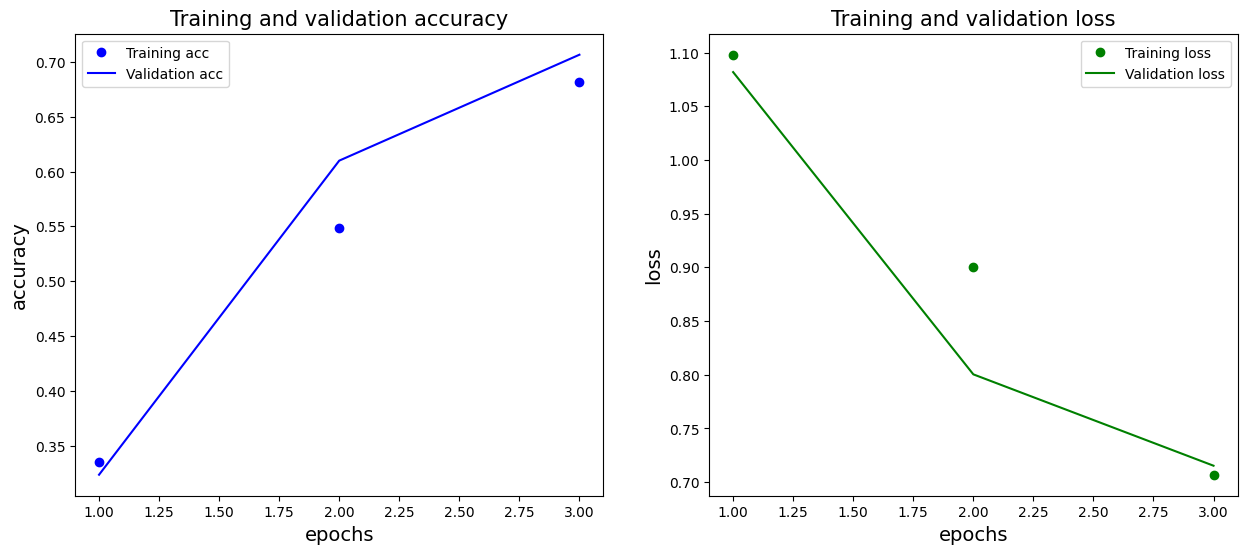

In [85]:
plot_loss_accuracy(r)

In [86]:
model.save('model_LSTM_final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
model.get_config()

In [89]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = None
r = None

model = load_model('model_LSTM_final.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          331800    
                                                                 
 bidirectional (Bidirection  (None, None, 256)         152576    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 256)         394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 256)         3

7. Analiza sentymentu

In [90]:
criterion = nn.BCEWithLogitsLoss()
criterion = criterion.to(device)

In [91]:
data5k.rename(columns={'targets':'label'}, inplace=True)
data5k.rename(columns={'Review':'text'}, inplace=True)
del data5k['Rating_class']
data5k.sample(3)

text  label
9594   particularly outstanding , give review site ex...      0
12228  extremely luxurious location westin extremely ...      2
12156  great hotel definitely recommend stay hotel , ...      2

In [92]:
from datasets import Dataset
dataset_ = Dataset.from_pandas(data5k)
dataset = dataset_.train_test_split(0.1)

In [93]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 2700
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 300
    })
})


In [94]:
model_checkpoint = 'microsoft/deberta-base'
batch_size = 128

In [95]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast = True)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [96]:
tokenizer('recommend hotel reviewer actually stay hotel')

{'input_ids': [1, 43140, 1397, 2303, 37102, 888, 1095, 2303, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [97]:
def process(x):
  return tokenizer(x['text'])

train_ds = dataset['train'].map(process)
eval_ds = dataset['test'].map(process)

Map:   0%|          | 0/2700 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [98]:
train_ds

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2700
})

In [99]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [100]:
!pip install -U accelerate==0.20.1 -q
#!pip install -U transformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 227.5/227.5 kB 2.8 MB/s eta 0:00:00


In [101]:
import transformers
#!pip install -qqq torch==2.0.1 --progress-bar off
#import accelerate 0.20.1

In [102]:
transformers.__version__, accelerate.__version__

('4.35.2', '0.20.3')

In [103]:
args = TrainingArguments(
    f'{model_checkpoint}_sentiment_analysis',
    evaluation_strategy  = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    num_train_epochs  = 5,
    weight_decay  = 0.01,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy'
)

In [104]:
from datasets import load_metric
import numpy as np

metric = load_metric('glue','sst2')

def compute_metrics(eval_preds):
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis = 1)
  return metric.compute(predictions = predictions, references = labels)

<ipython-input-104-211fb054b740>:4: FutureWarning:

load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate

/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning:

The repository for glue contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.0/metrics/glue/glue.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.



In [105]:
trainer = Trainer(
    model,
    args,
    train_dataset  = train_ds,
    eval_dataset = eval_ds,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [ ]:
trainer.evaluate([train_ds[0]])

In [ ]:
trainer.train()

In [107]:
%load_ext tensorboard

In [108]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logs/demo')

In [109]:
trainer.model

DebertaForSequenceClassification(
  (deberta): DebertaModel(
    (embeddings): DebertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=0)
      (LayerNorm): DebertaLayerNorm()
      (dropout): StableDropout()
    )
    (encoder): DebertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaLayer(
          (attention): DebertaAttention(
            (self): DisentangledSelfAttention(
              (in_proj): Linear(in_features=768, out_features=2304, bias=False)
              (pos_dropout): StableDropout()
              (pos_proj): Linear(in_features=768, out_features=768, bias=False)
              (pos_q_proj): Linear(in_features=768, out_features=768, bias=True)
              (dropout): StableDropout()
            )
            (output): DebertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): DebertaLayerNorm()
              (dropout): StableDropout()
            )
          )
          (

In [118]:
data5k

text  label
16730  lovely room bali tropic locate lovely beach so...      2
16157  fantastic great location right ground easy tra...      2
2330   w great , group 4 girl venture nola celebrate ...      2
18997  brilliant great hotel lovely room king size be...      2
3575   nice family vacation book annual family vacati...      2
...                                                  ...    ...
2738   nice beach terrible food , sick wife go 3 coup...      0
14185  5 star price half star service place clean bea...      0
11355  damn hotel stay fairly cheap accommodation pre...      0
11049  need little help , exchange 5 star timeshare s...      0
12656  beware , reservation expedia confirm e - mail ...      0

[3000 rows x 2 columns]

In [120]:
import torch

text = data5k['text'].loc[14185]
inputs = tokenizer(text, return_tensors='pt')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

with torch.no_grad():
  outputs = model(input_ids=input_ids, attention_mask=attention_mask)
  logits = outputs.logits
  predictions = torch.argmax(logits, dim=-1)

if predictions.item() == 0:
  print("negative example")
elif predictions.item() == 1:
  print("neutral example")
else:
  print("positive example")

neutral example


In [121]:
data5k['text'].loc[14185]

'5 star price half star service place clean beautiful service unbelievably bad , day room ready 5:30 pm , wait room wait hour 20 minute 2 hamburger pool restaurant , let bring food restaurant awful food bad service ridiculous price , 9 bottle water , mini bar , strongly suspect calamari asian fusion restaurant fry rubber band , sampler platter suppose include grill chicken beef shrimp eggplant plate chicken bite beef waiter care screw , staff zoom property day night loud gasoline power golf cart sound like parade lawn mower , charge 70 pick airport 85 drop old san juan 20 minute ride , ice machine towel , car rental desk charge twice rest puerto rico do , gran melia make extra money let non guest pay use pool place crawl kid day , feel like go great length squeeze dollar effort deliver passable service , travel lot mind pay nice place charge 5 star price give half star service , nearly ruin honeymoon , puerto rico great stay away gran melia ,'

In [122]:
data.iloc[14185]

Review          5 star prices half star service place clean be...
Rating_class                                             Negative
Name: 14185, dtype: object

8. Podsumowanie

Podczas analizy skupi≈Çam sie na znalezieniu optymalnego modelu, kt√≥ry umo≈ºliwi≈Çby poprawnƒÖ klasyfikacjƒô sentymentu dotyczƒÖcego przekazanych opinii.

Spo≈õr√≥d 5 stworzonych modeli wybra≈Çam jeden, kt√≥rego dokadno≈õƒá jest na poziomie val_accuracy: 0.7067 a strata na poziomie val_loss: 0.7152. Jest to model BiLSTM, dla kt√≥rego najlepszy wynik osiƒÖgnƒô≈Çam w 4 epoce. w dalszym dzia≈Çaniu modelu dochodzi≈Ço do jego przeuczenia.

Model w por√≥wnniu z modelem BiGRU osiƒÖgnƒÖ≈Ç lepsze wyniki, dlatego podczas tworzenia modelu do wykorzystania biznesowego wybra≈Çabym w≈Ça≈õnie ten model jako model bazowy do dalszego testowania. Oczywi≈õcie mo≈ºna jeszcze powalczyƒá o osiƒÖgniƒôcie wy≈ºszej dok≈Çadno≈õci, jednak na chwilƒô obecnƒÖ na tym ko≈Ñczƒô analizƒô.
